<a href="https://colab.research.google.com/github/suheylakarakaya/data_science/blob/main/movie_recomender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import sys
import csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
print("data", df.shape)

data (1000, 17)


In [90]:
df.columns

Index(['ID', 'Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
df.Series_Title.unique()

In [ ]:
df.Genre.unique()

In [ ]:
df['Genre'].value_counts().unique()

In [ ]:
df["Genre"].describe()

count      1000
unique      202
top       Drama
freq         85
Name: Genre, dtype: object

In [ ]:
df["Director"].describe()

count                 1000
unique                 548
top       Alfred Hitchcock
freq                    14
Name: Director, dtype: object

In [ ]:
df.describe(include=['O'])

In [ ]:
df.sort_values(by='Director', ascending=False).head(10)

In [ ]:
matrix

In [ ]:
df.head(3)

In [ ]:
df.tail(3)

In [ ]:
df["Overview"].head(3)

0    Two imprisoned men bond over a number of years...
1    An organized crime dynasty's aging patriarch t...
2    When the menace known as the Joker wreaks havo...
Name: Overview, dtype: object

# **Content-Based Recommendation System**


In [ ]:
import nltk
nltk.download("stopwords")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [ ]:
matrix = tfv.fit_transform(df['Overview'])

In [ ]:
matrix.shape

(1000, 1319)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(matrix, matrix)

In [ ]:
sig[0]

In [ ]:
indices = pd.Series(df.index, index=df['Series_Title']).drop_duplicates()

In [ ]:
indices

In [ ]:
indices["Lifeboat"]

998

In [ ]:
sig[998]

In [ ]:
sig[indices['Lifeboat']]

In [ ]:
list(enumerate(sig[indices['Lifeboat']]))

In [ ]:
def give_rec(title, sig=sig):
    id = indices[title]
    scores = list(enumerate(sig[id]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:11]
    series_indices = [i[0] for i in scores]
    return pd.DataFrame({"title":df['Series_Title'].iloc[series_indices],"scores":scores})

In [ ]:
give_rec('Hamilton')

# **DATA VISULATION**



In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
df["Genre"].head(10)

In [86]:
genres=[]
for Genre in df.Genre:
  x=Genre.split(',')
  for i in x:
    if i not in genres:
      genres.append(str(i))
genres=str(genres)    

movie_title=[]
for Series_Title in df.Series_Title:
  movie_title.append(Series_Title)
movie_title=str(movie_title)  

In [83]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2).generate(movie_title)

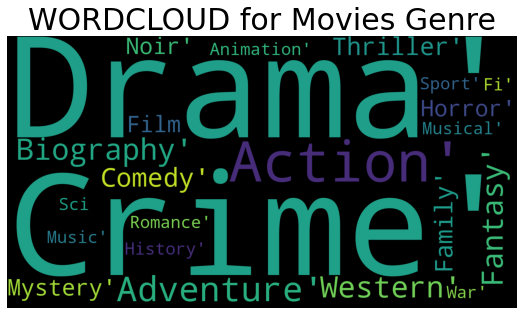

In [80]:
plt.figure(figsize=(20,5))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

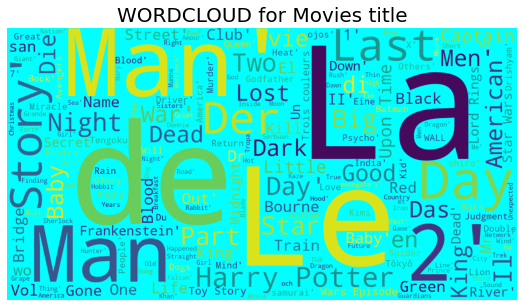

In [88]:
plt.figure(figsize=(20,5))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=20)
plt.imshow(wordcloud_title)

In [105]:
df1=df.groupby(['Series_Title'])[['IMDB_Rating']].sum()
high_rated=df1.nlargest(20,'IMDB_Rating')
high_rated.head()

,IMDB_Rating
Series_Title,
Drishyam,16.5
The Shawshank Redemption,9.3
The Godfather,9.2
12 Angry Men,9.0
The Dark Knight,9.0


<BarContainer object of 20 artists>

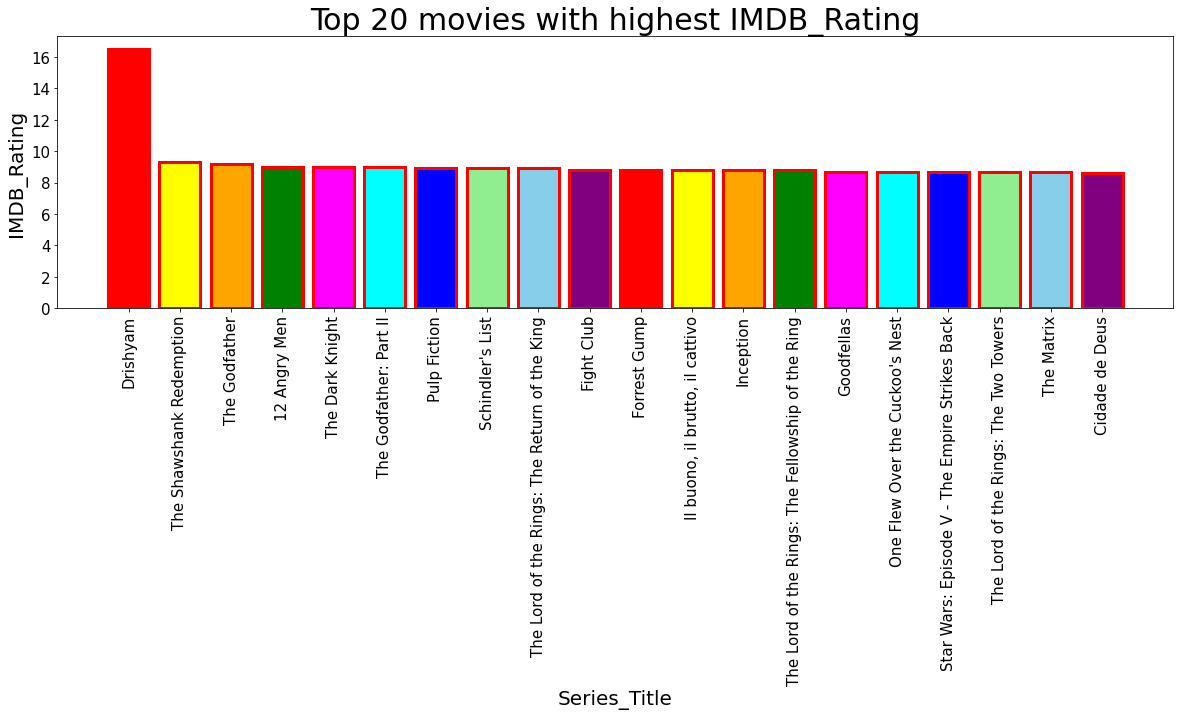

In [112]:
plt.figure(figsize=(20,5))
plt.title('Top 20 movies with highest IMDB_Rating',fontsize=30)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('IMDB_Rating',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Series_Title',fontsize=20)
plt.yticks(fontsize=15)
plt.bar(high_rated.index,high_rated['IMDB_Rating'],linewidth=3,edgecolor='red',color=colors)